In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install conllu

In [3]:
pip install farm-haystack[faiss]

     |████████████████████████████████| 430 kB 5.4 MB/s 
     |████████████████████████████████| 14.1 MB 24.2 MB/s 
     |████████████████████████████████| 219 kB 47.2 MB/s 
     |████████████████████████████████| 359 kB 53.1 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 3.3 MB 31.8 MB/s 
     |████████████████████████████████| 5.6 MB 19.7 MB/s 
     |████████████████████████████████| 981 kB 38.7 MB/s 
     |████████████████████████████████| 10.7 MB 28.6 MB/s 
     |████████████████████████████████| 321 kB 42.1 MB/s 
     |████████████████████████████████| 10.9 MB 8.1 MB/s 
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 85 kB 2.9 MB/s 
     |████████████████████████████████| 178 kB 21.1 MB/s 
     |████████████████████████████████| 895 kB 33.4 MB/s 
     |████████████████████████████████| 596 kB 36.1 MB/s 
     |███████████████

# Parse data


In [1]:
from conllu import parse

input_file = "/content/drive/MyDrive/PY/SemEval2022/crl_srl.csv"

with open(input_file, mode='r') as fp:
    input_data = fp.read()
    
sentences = parse(input_data)

In [2]:
import pandas as pd
df_img = pd.read_csv('/content/drive/MyDrive/PY/SemEval2022/df_img.csv')

In [3]:
import ast
# ast.literal_eval(df_img.caption[0]) # string to py list
df_img['caption'] = [ast.literal_eval(df_img.caption[i]) for i in range(len(df_img))]

In [4]:
df_img.caption[0]

[['a', 'person', 'in', 'tomatoes,', 'pink', 'frosting', '<end>'],
 ['blurry',
  'air',
  'white',
  'vegetables',
  'arranged',
  'on',
  'display',
  'at',
  'market.',
  '<end>'],
 ['the', 'woman', 'has', 'a', 'variety', 'of', 'pastries.', '<end>']]

In [ ]:
df_img

,Unnamed: 0,f_root,f_step,pic_lst,path,caption
0,0,f-FQD8HS7R,f-FQD8HS7R_step01_sent02,"['442.jpg', '440.jpg', '444.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[a, person, in, tomatoes,, pink, frosting, <e..."
1,1,f-FQD8HS7R,f-FQD8HS7R_step04_sent01,"['516.jpg', '514.jpg', '512.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[a, massive, pizza, filled, with, remote, on,..."
2,2,f-FQD8HS7R,f-FQD8HS7R_step03_sent01,"['1374.jpg', '1376.jpg', '1372.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[a, close, up, of, a, knife, cutting, a, knif..."
3,3,f-FQD8HS7R,f-FQD8HS7R_step02_sent02,"['320.jpg', '318.jpg', '316.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[a, pan, is, preparing, bread, has, a, dinner..."
4,4,f-FQD8HS7R,f-FQD8HS7R_step02_sent01,"['20.jpg', '16.jpg', '18.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[an, [UNK], blue, at, a, sign., <end>], [the,..."
...,...,...,...,...,...,...
1684,1684,f-8W878JWV,f-8W878JWV_step03_sent01,"['12.jpg', '14.jpg', '16.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[a, hot, face, being, face, <end>], [a, woman..."
1685,1685,f-C3DGBX3K,f-C3DGBX3K_step04_sent01,"['508.jpg', '506.jpg', '504.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[pizza, on, the, grill., <end>], [a, glass, y..."
1686,1686,f-C3DGBX3K,f-C3DGBX3K_step01_sent03,"['74.jpg', '76.jpg', '72.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[two, people, take, off, of, equipment., <end..."
1687,1687,f-C3DGBX3K,f-C3DGBX3K_step01_sent02,"['60.jpg', '62.jpg', '64.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[a, hospital, being, cut, in, an, [UNK], <end..."


In [ ]:
' '.join(df_img.caption[0][0])

'a person in tomatoes, pink frosting <end>'

In [ ]:
sentences[0].metadata['metadata:url']

'https://foodista.com/recipe/6VWP66LZ/vegetables-and-minced-meat-casserole'

In [ ]:
sentences[0].__dict__

{'default_fields': ('id',
  'form',
  'lemma',
  'upos',
  'xpos',
  'feats',
  'head',
  'deprel',
  'deps',
  'misc'),
 'metadata': {'answer 0-0': '1',
  'answer 0-1': '1',
  'answer 0-2': '1',
  'answer 1-0': 'the cooked rice and vegetables and minced meat casserole',
  'answer 12-0': 'to the cooked vegetables',
  'answer 13-0': 'with cooked rice or something similar ( couscous , mashed potatoes )',
  'answer 18-0': 'N/A',
  'answer 18-1': 'N/A',
  'answer 2-0': 'by using a knife',
  'answer 2-1': 'by using a knife',
  'answer 2-2': 'pan',
  'answer 2-3': 'pan',
  'answer 3-0': 'the meat',
  'answer 3-1': 'the chopped vegetables',
  'answer 3-2': 'the broccoli and stem',
  'answer 3-3': 'by adding the chopped vegetables to the pan',
  'answer 3-4': 'by cutting the broccoli and stem with the knife',
  'answer 4-0': 'the first event',
  'answer 4-1': 'the second event',
  'answer 4-2': 'the second event',
  'answer 4-3': 'the second event',
  'answer 4-4': 'the first event',
  'answer

In [ ]:
sentences[25].__dict__

{'default_fields': ('id',
  'form',
  'lemma',
  'upos',
  'xpos',
  'feats',
  'head',
  'deprel',
  'deps',
  'misc'),
 'metadata': {'newpar id': 'f-GGX2LSGX::step01',
  'sent_id': 'f-GGX2LSGX::step01::sent01',
  'text': 'Preheat the oven to 350deg F.'}}

In [ ]:
sentences[25].__len__()

6

In [ ]:
type(sentences[0])

conllu.models.TokenList

In [ ]:
sentences[0].metadata

{'answer 0-0': '1',
 'answer 0-1': '1',
 'answer 0-2': '1',
 'answer 1-0': 'the cooked rice and vegetables and minced meat casserole',
 'answer 12-0': 'to the cooked vegetables',
 'answer 13-0': 'with cooked rice or something similar ( couscous , mashed potatoes )',
 'answer 18-0': 'N/A',
 'answer 18-1': 'N/A',
 'answer 2-0': 'by using a knife',
 'answer 2-1': 'by using a knife',
 'answer 2-2': 'pan',
 'answer 2-3': 'pan',
 'answer 3-0': 'the meat',
 'answer 3-1': 'the chopped vegetables',
 'answer 3-2': 'the broccoli and stem',
 'answer 3-3': 'by adding the chopped vegetables to the pan',
 'answer 3-4': 'by cutting the broccoli and stem with the knife',
 'answer 4-0': 'the first event',
 'answer 4-1': 'the second event',
 'answer 4-2': 'the second event',
 'answer 4-3': 'the second event',
 'answer 4-4': 'the first event',
 'answer 4-5': 'the first event',
 'answer 5-0': 'into cubes',
 'answer 6-0': 'saute onion in 2 tablespoons of olive oil',
 'answer 8-0': 'into the pan with the veg

In [ ]:
sentences[0].metadata['metadata:url'].split('/')[-1]

'vegetables-and-minced-meat-casserole'

In [ ]:
# # add imgage caption data
# recipes = []
# titles = []
# doc_ID = []
# temp = []
# # stepnames = []
# for i, sentence in enumerate(sentences):
#     #if 'metadata:num_ingres' in sentence.metadata.keys() and 'metadata:num_steps' in sentence.metadata.keys() :
#     if 'newdoc id' in sentence.metadata.keys():
#         recipes.append(" ".join(temp))
#         temp = []
#         if 'metadata:url' in sentence.metadata.keys():
#           titles.append(sentence.metadata['metadata:url'].split('/')[-1])  #.replace('-',' ').replace('_',' ')
#     # print(sentence.metadata)
#     if 'newdoc id' in sentence.metadata.keys():
#       doc_ID.append(sentence.metadata['newdoc id'])
#     if 'text' in sentence.metadata.keys():
#         temp.append(sentence.metadata['text'])
#     if 'newpar id' in sentence.metadata.keys() and 'sent_id' in sentence.metadata.keys():
#         stepname = sentence.metadata['sent_id'].replace('::','_')
# #         stepnames.append(stepname)
#         if stepname in df_img.f_step.values:
#             temp.append(' '.join(df_img[df_img.f_step==stepname]['caption'].values[0][0])) #add img. caption to step      
#             temp.append(' '.join(df_img[df_img.f_step==stepname]['caption'].values[0][1])) #add img. caption to step            
#             temp.append(' '.join(df_img[df_img.f_step==stepname]['caption'].values[0][2])) #add img. caption to step            
            
# recipes.append(" ".join(temp))
        
# recipes = recipes[1:]

In [ ]:
# input_data = []
# count = 0
# for i, sentence in enumerate(sentences):
#     if 'newdoc id' in sentence.metadata.keys():        
#         data = dict()
#         for key in sentence.metadata.keys():
#             if 'question ' in key:
#                 question = sentence.metadata[key]
#                 answer = sentence.metadata[key.replace('question', 'answer')]
#                 #print(count)
#                 # text = recipes[count]
#                 recipeID = count

#                 input_data.append({'recipeID':count, 'recipeTitle':titles[count], 'question':question, 'answer':answer})
#         count += 1

In [ ]:
df_img

,Unnamed: 0,f_root,f_step,pic_lst,path,caption
0,0,f-FQD8HS7R,f-FQD8HS7R_step01_sent02,"['442.jpg', '440.jpg', '444.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[a, person, in, tomatoes,, pink, frosting, <e..."
1,1,f-FQD8HS7R,f-FQD8HS7R_step04_sent01,"['516.jpg', '514.jpg', '512.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[a, massive, pizza, filled, with, remote, on,..."
2,2,f-FQD8HS7R,f-FQD8HS7R_step03_sent01,"['1374.jpg', '1376.jpg', '1372.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[a, close, up, of, a, knife, cutting, a, knif..."
3,3,f-FQD8HS7R,f-FQD8HS7R_step02_sent02,"['320.jpg', '318.jpg', '316.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[a, pan, is, preparing, bread, has, a, dinner..."
4,4,f-FQD8HS7R,f-FQD8HS7R_step02_sent01,"['20.jpg', '16.jpg', '18.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[an, [UNK], blue, at, a, sign., <end>], [the,..."
...,...,...,...,...,...,...
1684,1684,f-8W878JWV,f-8W878JWV_step03_sent01,"['12.jpg', '14.jpg', '16.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[a, hot, face, being, face, <end>], [a, woman..."
1685,1685,f-C3DGBX3K,f-C3DGBX3K_step04_sent01,"['508.jpg', '506.jpg', '504.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[pizza, on, the, grill., <end>], [a, glass, y..."
1686,1686,f-C3DGBX3K,f-C3DGBX3K_step01_sent03,"['74.jpg', '76.jpg', '72.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[two, people, take, off, of, equipment., <end..."
1687,1687,f-C3DGBX3K,f-C3DGBX3K_step01_sent02,"['60.jpg', '62.jpg', '64.jpg']",/content/drive/MyDrive/PY/SemEval2022/images/f...,"[[a, hospital, being, cut, in, an, [UNK], <end..."


In [ ]:
 sentences[1].metadata['sent_id'].split('::')[0]

'f-6VWP66LZ'

# New parse 

In [5]:
def parseFileNew(input_file):

  with open(input_file, mode='r') as fp:
      data = fp.read()
  sentences = parse(data)
  recipes = {}
  ingredients = {}
  titles = {}
  input_data = []
  for i, sentence in enumerate(sentences):
    if len(sentence.metadata)>0:
      if 'newdoc id' in sentence.metadata.keys(): # sentences[0]
          doc_id = sentence.metadata['newdoc id']
          recipes[doc_id] = ''
          ingredients[doc_id] = [sentence.metadata['text']]

          # if 'metadata:url' in sentence.metadata.keys():
          title = sentence.metadata['metadata:url'].split('/')[-1]  #.replace('-',' ').replace('_',' ')
          titles[doc_id] = title 

          for key in sentence.metadata.keys():
            if 'question ' in key:
              question = sentence.metadata[key]
              answer = ''
              if key.replace('question', 'answer') in sentence.metadata:
                answer = sentence.metadata[key.replace('question', 'answer')]

              input_data.append({'doc_ID':doc_id, 'recipeTitle':title, 
                                     'question':question,'qkey':key, 'answer':answer})
          
      else:
        if 'newpar id' in sentence.metadata.keys():
          doc_id = sentence.metadata['newpar id'].split('::')[0]
          recipes[doc_id] += sentence.metadata['text']
          stepname = sentence.metadata['sent_id'].replace('::','_')

          if stepname in df_img.f_step.values:
            imgCaption = ' '.join([i for t in df_img[df_img.f_step==stepname]['caption'].values[0] for i in t[:-1]])
            recipes[doc_id] += imgCaption


        else:
          doc_id = sentence.metadata['sent_id'].split('::')[0]
          ingredients[doc_id] += [sentence.metadata['text']]

  return recipes, ingredients, titles, input_data

In [ ]:
recipes['f-YJNCYBQY']

"Preheat oven to 325.Cream butter well.Pour into pan and bake for 60 to 75 minutes or until a cake tester comes out clean.As with any cake you're supposed to allow it to cool before slicing but I love a piece when the top is slightly crusty and the inside is soft,warm and that vanilla, buttery aroma steams up to your nose with each bite!For the topping, slice strawberries.Sprinkle with sugar.Pour in rum.Stir and let sit for 1 to 2 hours so juices release and alcohol soaks into he berries.Slice cake layers.Top with strawberries and whipped creme!"

In [ ]:
ingredients['f-26574QCW']

['3 tbsp olive oil',
 '3 cups apple cider',
 '1 cup apple cider vinegar',
 '1 1/2 tbsp Tomato & Parsley Vinaigrette',
 '1 1/4 lb turnips',
 '1 1/4 lb parsnip',
 '1 1/4 lb carrots',
 '1 1/4 lb red or sweet potatoes (I like leaving the skins on)',
 '1 large red onion, quartered',
 '1 med chopped zucchini for color (optional)']

In [ ]:
recipes['f-26574QCW']

['Boil apple juice and wine in a large saucepan until reduced to 3/4 cup, about 30 min.',
 'Whisk in olive oil and Veggie Rub.',
 'Preheat oven to 425 f.',
 'Peel and cut vegetables into 1/2 inch pieces.',
 'Divide between 2 roasting pans.',
 'Pour apple juice mixture over vegetables.',
 'Toss to coat.',
 'Roast until vegetables are tender & golden, stirring occasionally, about 40 min.']

In [ ]:
len(recipes), len(titles), len(ingredients)

(800, 800, 800)

In [ ]:
sentences[0].metadata

{'answer 0-0': '1',
 'answer 0-1': '1',
 'answer 0-2': '1',
 'answer 1-0': 'the cooked rice and vegetables and minced meat casserole',
 'answer 12-0': 'to the cooked vegetables',
 'answer 13-0': 'with cooked rice or something similar ( couscous , mashed potatoes )',
 'answer 18-0': 'N/A',
 'answer 18-1': 'N/A',
 'answer 2-0': 'by using a knife',
 'answer 2-1': 'by using a knife',
 'answer 2-2': 'pan',
 'answer 2-3': 'pan',
 'answer 3-0': 'the meat',
 'answer 3-1': 'the chopped vegetables',
 'answer 3-2': 'the broccoli and stem',
 'answer 3-3': 'by adding the chopped vegetables to the pan',
 'answer 3-4': 'by cutting the broccoli and stem with the knife',
 'answer 4-0': 'the first event',
 'answer 4-1': 'the second event',
 'answer 4-2': 'the second event',
 'answer 4-3': 'the second event',
 'answer 4-4': 'the first event',
 'answer 4-5': 'the first event',
 'answer 5-0': 'into cubes',
 'answer 6-0': 'saute onion in 2 tablespoons of olive oil',
 'answer 8-0': 'into the pan with the veg

In [ ]:
sentences[1].metadata

{'sent_id': 'f-6VWP66LZ::ingredients::sent02', 'text': '300g carrots'}

In [ ]:
sentences[9].metadata

{'newpar id': 'f-6VWP66LZ::step01',
 'sent_id': 'f-6VWP66LZ::step01::sent01',
 'text': 'Cut the broccoli into flowerets and the stem into bite-size pieces; cut carrots and zucchini into cubes.'}

In [ ]:
len(recipes)

800

In [ ]:
len(doc_IDs)

800

In [ ]:
len(titles)

800

In [ ]:
# input_file = "/content/drive/MyDrive/PY/SemEval2022/crl_srl.csv"

def parseFile(input_file):
  with open(input_file, mode='r') as fp:
      input_data = fp.read()
      
  sentences = parse(input_data)
  recipes = []
  titles = []
  # doc_IDs = []
  temp = []
  # for i, sentence in enumerate(sentences):
  #     #if 'metadata:num_ingres' in sentence.metadata.keys() and 'metadata:num_steps' in sentence.metadata.keys() :
  #     if 'newdoc id' in sentence.metadata.keys():
  #         recipes.append(" ".join(temp))
  #         temp = []
  #         if 'metadata:url' in sentence.metadata.keys():
  #           titles.append(sentence.metadata['metadata:url'].split('/')[-1])  #.replace('-',' ').replace('_',' ')
  #     # print(sentence.metadata)
  #     if 'text' in sentence.metadata.keys():
  #         temp.append(sentence.metadata['text'])
  # recipes.append(" ".join(temp))
          
  # recipes = recipes[1:]
  for i, sentence in enumerate(sentences):
    #if 'metadata:num_ingres' in sentence.metadata.keys() and 'metadata:num_steps' in sentence.metadata.keys() :
    if 'newdoc id' in sentence.metadata.keys():
        recipes.append(" ".join(temp))
        temp = []
        if 'metadata:url' in sentence.metadata.keys():
          titles.append(sentence.metadata['metadata:url'].split('/')[-1])  #.replace('-',' ').replace('_',' ')
    # print(sentence.metadata)
    # if 'newdoc id' in sentence.metadata.keys():
    #   doc_IDs.append(sentence.metadata['newdoc id'])
    if 'text' in sentence.metadata.keys():
        temp.append(sentence.metadata['text'])
    if 'newpar id' in sentence.metadata.keys() and 'sent_id' in sentence.metadata.keys():
        stepname = sentence.metadata['sent_id'].replace('::','_')
#         stepnames.append(stepname)
        if stepname in df_img.f_step.values:
            temp.append(' '.join(df_img[df_img.f_step==stepname]['caption'].values[0][0])) #add img. caption to step      
            temp.append(' '.join(df_img[df_img.f_step==stepname]['caption'].values[0][1])) #add img. caption to step            
            temp.append(' '.join(df_img[df_img.f_step==stepname]['caption'].values[0][2])) #add img. caption to step      
        
  input_data = []
  count = 0
  for i, sentence in enumerate(sentences):
      if 'newdoc id' in sentence.metadata.keys():   
          doc_ID = sentence.metadata['newdoc id']     
          data = dict()
          for key in sentence.metadata.keys():
              if 'question ' in key:
                  question = sentence.metadata[key]
                  #print(count)
                  # text = recipes[count]
                  recipeID = count
                  answer = ''
                  if key.replace('question', 'answer') in sentence.metadata:
                      answer = sentence.metadata[key.replace('question', 'answer')]

                  
                  input_data.append({'doc_ID':doc_ID,'recipeID':count, 'recipeTitle':titles[count],
                                     'question':question,'qkey':key.replace(' ','_'), 'answer':answer})
          count += 1

  return recipes, titles, input_data 

In [6]:
recipes, ingredients, titles, input_data  = parseFileNew("/content/drive/MyDrive/PY/SemEval2022/crl_srl.csv")
# recipes_val, titles_val, input_data_val  = parseFile("/content/drive/MyDrive/PY/SemEval2022/crl_srl_val.csv")
recipes_test, ingredients_test, titles_test, input_data_test  = parseFileNew("/content/drive/MyDrive/PY/SemEval2022/crl_srl_test.csv")

In [ ]:
len(recipes), len(titles), len(input_data)

(800, 800, 26526)

In [ ]:
len(recipes_test), len(titles_test), len(input_data_test)

(100, 100, 3442)

In [ ]:
len(recipes)

800

In [ ]:
len(input_data)

26526

In [ ]:
recipes.extend(recipes_test)
titles.extend(titles_test)


# RAG
https://github.com/deepset-ai/haystack

https://github.com/deepset-ai/haystack/blob/master/tutorials/Tutorial7_RAG_Generator.ipynb

https://github.com/facebookresearch/DPR


In [4]:
!pip install grpcio-tools==1.34.1
!pip install git+https://github.com/deepset-ai/haystack.git

     |████████████████████████████████| 2.5 MB 3.6 MB/s 
  Cloning https://github.com/deepset-ai/haystack.git to /tmp/pip-req-build-7yamivwy
  Running command git clone -q https://github.com/deepset-ai/haystack.git /tmp/pip-req-build-7yamivwy
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [8]:
from typing import List
import requests
import pandas as pd
from haystack import Document
from haystack.document_stores import FAISSDocumentStore
from haystack.nodes import RAGenerator, DensePassageRetriever

INFO - haystack.modeling.model.optimization -  apex not found, won't use it. See https://nvidia.github.io/apex/


In [ ]:
pd.DataFrame({'recipes':pd.Series(recipes),'title':pd.Series(titles)})

,recipes,title
f-6VWP66LZ,Cut the broccoli into flowerets and the stem into bite-size pieces; cut carr...,vegetables-and-minced-meat-casserole
f-GGX2LSGX,Preheat the oven to 350deg F.Heat the olive oil and butter in a large skille...,caramelized-onion-bacon-tart
f-GPT7GGG6,Cook pasta in large salted pot of boiling water according to pasta package d...,ink-pasta-with-shrimps-tomatoes-and-garlic
f-Y2HTQLYW,Combine all of the above ingredients in a food processor and process until s...,chickpea-patty-sandwich
f-DXL86CWX,Boil the potatoes for 20 minutes or until cooked.Peel the potatoes and slice...,trout-with-creamy-potato-salad
...,...,...
f-NNCLJCD3,Mix the finely chopped dill with the panko breadcrumbs in a shallow bowl.Dus...,shrimps-fingers
r-1388,"Preheat an oven to 350 degF (175 degC).Mix flour, baking powder, salt, and s...",Irish_Soda_Bread
r-1751,Finely dice all the ingredients and mix with the mayonnaise.a young lady cut...,Fleischsalat
r-4833,"For cocoa mix, in a storage container combine dry milk powder, cocoa powder,...",Mexican-style_Hot_Chocolate


In [ ]:
len(question_combine)

26526

In [ ]:
input_data[0]

{'answer': '1',
 'doc_ID': 'f-6VWP66LZ',
 'qkey': 'question 0-1',
 'question': 'How many actions does it take to process the minced meat?',
 'recipeTitle': 'vegetables-and-minced-meat-casserole'}

In [9]:
def prepareText(recipes, titles, input_data):
  df = pd.DataFrame({'title':titles,'text':recipes})
  df = df.fillna('N/A')
  df_qa = pd.DataFrame(input_data)
  df_qa['dummy'] = [' in '] * len(df_qa)
  df_qa['question'] = df_qa['question'].apply(lambda x: x[:-1])
  df_qa['question'] = df_qa['question'] + df_qa['dummy'] + df_qa['recipeTitle']

  df_new = pd.DataFrame({'title':pd.concat([df.title,df_qa.iloc[100:,].reset_index().answer]), 
                        'text':pd.concat([df.text,df_qa.iloc[100:,].reset_index().question])})
  df_new.fillna('')
  return df_new, df_qa

In [10]:
def parseQA(recipes,input_data): 
  question_combine = []
  answers = []
  for i in input_data:
    ques  = i['question'] + ' ' + i['recipeTitle'] + ' ' +recipes[i['doc_ID']]
    answer = i['answer'] 
    question_combine.append(ques)
    answers.append(answer)
  return  question_combine, answers

In [11]:
ques_train, answers_train = parseQA(recipes, input_data)
# _, df_qa_val = prepareText(recipes_val, titles_val, input_data_val)
ques_test, answers_test = parseQA(recipes_test, input_data_test)


In [12]:
len(ques_train),len(ques_test), len(answers_train),len(answers_test)

(26526, 3442, 26526, 3442)

In [ ]:
import random
# x = Counter((ques_train[0]).split(' '))
ques_train_sample = [' '.join(random.sample(i.split(' '),int(len(i.split(' '))*0.1))) for i in ques_train]
ques_test_sample = [' '.join(random.sample(i.split(' '),int(len(i.split(' '))*0.1))) for i in ques_test]


## Forward to RAG

In [13]:
# Use data to initialize Document objects
titles = answers_train + answers_test
texts = ques_train + ques_test
documents: List[Document] = []
for title, text in zip(titles, texts):
    documents.append(
        Document(
            content=text,
            meta={
                "name": title or ""
            }
        )
    )

In [14]:
# Initialize FAISS document store.
# Set `return_embedding` to `True`, so generator doesn't have to perform re-embedding
document_store = FAISSDocumentStore(
    faiss_index_factory_str="Flat",
    return_embedding=True
)

# Initialize DPR Retriever to encode documents, encode question and query documents
retriever = DensePassageRetriever(
    document_store=document_store,
    query_embedding_model="facebook/dpr-question_encoder-single-nq-base",
    passage_embedding_model="facebook/dpr-ctx_encoder-single-nq-base",
    use_gpu=True,
    embed_title=True,
)

# Initialize RAG Generator
generator = RAGenerator(
    model_name_or_path="facebook/rag-token-nq",
    use_gpu=True,
    top_k=1,
    max_length=200,
    min_length=2,
    embed_title=True,
    num_beams=2,
)

INFO - haystack.modeling.utils -  Using devices: CUDA:0
INFO - haystack.modeling.utils -  Number of GPUs: 1


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/493 [00:00<?, ?B/s]

INFO - haystack.modeling.model.language_model -  LOADING MODEL
INFO - haystack.modeling.model.language_model -  =============
INFO - haystack.modeling.model.language_model -  Could not find facebook/dpr-question_encoder-single-nq-base locally.
INFO - haystack.modeling.model.language_model -  Looking on Transformers Model Hub (in local cache and online)...


Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

INFO - haystack.modeling.model.language_model -  Loaded facebook/dpr-question_encoder-single-nq-base


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizerFast'.
INFO - haystack.modeling.model.language_model -  LOADING MODEL
INFO - haystack.modeling.model.language_model -  =============
INFO - haystack.modeling.model.language_model -  Could not find facebook/dpr-ctx_encoder-single-nq-base locally.
INFO - haystack.modeling.model.language_model -  Looking on Transformers Model Hub (in local cache and online)...


Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

INFO - haystack.modeling.model.language_model -  Loaded facebook/dpr-ctx_encoder-single-nq-base
INFO - haystack.modeling.utils -  Using devices: CUDA
INFO - haystack.modeling.utils -  Number of GPUs: 1


Downloading:   0%|          | 0.00/4.49k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/bart/configuration_bart.py:178: UserWarning: Please make sure the config includes `forced_bos_token_id=0` in future versions. The config can simply be saved and uploaded again to be fixed.
  f"Please make sure the config includes `forced_bos_token_id={self.bos_token_id}` in future versions. "


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizerFast'.


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'BartTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'BartTokenizerFast'.


Downloading:   0%|          | 0.00/1.92G [00:00<?, ?B/s]

Some weights of RagTokenForGeneration were not initialized from the model checkpoint at facebook/rag-token-nq and are newly initialized: ['rag.generator.lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
# Delete existing documents in documents store
document_store.delete_documents()

# Write documents to document store
document_store.write_documents(documents)

# Add documents embeddings to index
document_store.update_embeddings(
    retriever=retriever
)

Writing Documents:   0%|          | 0/29968 [00:00<?, ?it/s]

INFO - haystack.document_stores.faiss -  Updating embeddings for 29500 docs...


Updating Embedding:   0%|          | 0/29500 [00:00<?, ? docs/s]

Create embeddings:   0%|          | 0/10000 [00:00<?, ? Docs/s]

Create embeddings:   0%|          | 0/10000 [00:00<?, ? Docs/s]

Create embeddings:   0%|          | 0/9504 [00:00<?, ? Docs/s]

In [ ]:
import pickle
# with open('/content/drive/MyDrive/PY/SemEval2022/document_store.pickle', 'wb') as handle:
#     pickle.dump(document_store, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('/content/drive/MyDrive/PY/SemEval2022/generator.pickle', 'wb') as handle:
    pickle.dump(generator, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('/content/drive/MyDrive/PY/SemEval2022/retriever.pickle', 'wb') as handle:
#     pickle.dump(retriever, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
df_qa_test.question

0                              Where should you drain the water and eggplant in Zaalouk
1                                                   How many spoons are used in Zaalouk
2          Where do you add the eggplant when the egg plant is almost cooked in Zaalouk
3        Heating the oil in a pan and cooling the mixture, which comes first in Zaalouk
4       Putting the mixture in a wood container and grating carrots, which comes fir...
                                             ...                                       
3437                                                What's in the mixture in Huzarensla
3438     Where was the mixture before it was refrigerated for best flavor in Huzarensla
3439                                          How did you get the mixture in Huzarensla
3440                 How many actions does it take to process the paprika in Huzarensla
3441          For how long do you refrigerate the mixture for best flavor in Huzarensla
Name: question, Length: 3442, dt

In [17]:
from tqdm import tqdm

In [18]:
pred_answers = [] 
for question in tqdm(ques_test):
    # Retrieve related documents from retriever
    retriever_results = retriever.retrieve(
        query=question
    )

    # Now generate answer from question and retrieved documents
    predicted_result = generator.predict(
        query=question,
        documents=retriever_results,
        top_k=1
    )

    # Print you answer
    answers = predicted_result["answers"]
    pred_answers.append(answers[0].answer)
    # print(f'Generated answer is \'{answers[0].answer}\' for the question = \'{question}\'')

  0%|          | 0/3442 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/models/rag/tokenization_rag.py:97: FutureWarning: `prepare_seq2seq_batch` is deprecated and will be removed in version 5 of 🤗 Transformers. Use the regular `__call__` method to prepare your inputs and the tokenizer under the `with_target_tokenizer` context manager to prepare your targets. See the documentation of your specific tokenizer for more details
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1749: UserWarning: `max_length` is deprecated in this function, use `stopping_criteria=StoppingCriteriaList(MaxLengthCriteria(max_length=max_length))` instead.
  UserWarning,
100%|██████████| 3442/3442 [1:28:17<00:00,  1.54s/it]


In [19]:
doc_IDs,qkeys = [],[]
for i in input_data_test:
  doc_IDs.append(i['doc_ID'])
  qkeys.append(i['qkey'])

df_res = pd.DataFrame({'doc_ID':doc_IDs, 'qkeys':qkeys, 'pred':pred_answers})
# dict_res = dict(df_res.groupby('doc_ID').apply(lambda x: dict(zip(x['qkeys'],x['pred']))))

# import json
# with open("/content/drive/MyDrive/PY/SemEval2022/new_res.json", "w") as outfile:
#     json.dump(dict_res, outfile)

# dict_res

In [24]:
recipes_test, ingredients_test, titles_test, input_data_test  = parseFileNew('/content/drive/MyDrive/PY/SemEval2022/test_WITH_ANSWERS.csv')
df_eval = pd.DataFrame(input_data_test).sort_values(by=['doc_ID','qkey']).reset_index(drop=True)
df_eval['pred'] = df_res.sort_values(by=['doc_ID','qkeys']).reset_index(drop=True)['pred']
df_eval['answer'] = df_eval.answer.astype('string')
df_eval['pred'] = df_eval.pred.astype('string')
df_eval['pred'] = [i.strip() for i in df_eval['pred']]
df_eval['pred'] = df_eval['pred'].replace('one','1').replace('two','2').replace('three','3').replace('four','4').replace('five','5').replace('six','6')
(df_eval['pred']==df_eval['answer']).value_counts()

False    3266
True      176
dtype: Int64

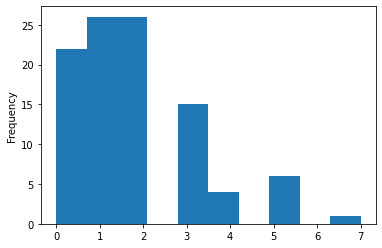

In [21]:
df_eval['EM'] = (df_eval['pred']==df_eval['answer'])
df_eval.groupby('doc_ID').sum()['EM'].plot.hist()

In [22]:
df_eval.to_csv('/content/drive/MyDrive/PY/SemEval2022/EVAL_test_predition_alldata.csv')

In [23]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import MultiLabelBinarizer
word_level_true = [i.split(' ') for i in df_eval.answer]
word_level_pred = [i.split(' ') for i in df_eval.pred]
binar = MultiLabelBinarizer()
y_true = binar.fit_transform(word_level_true)
y_pred = binar.transform(word_level_pred)

f1_score(y_true, y_pred, average='macro'),f1_score(y_true, y_pred, average='micro'),f1_score(y_true, y_pred, average='weighted'),

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ["''", '*', '--', '-lime', '-pakora', '-quart', '/', '180oc.', '2.', '2018', '2x2', '33', '340', '350f', '375', '4.5', '4.5.', '6.', '6.6.', '7.6.6.7.6.6.6.6.6.6.6.9', '7.6.7.6.6.6.6', '7.8', ';', 'Bran_', 'Combine', 'Dice', 'Dissolve', 'Divide', 'Immediately', 'In', 'Just', 'Mince', 'Mix', 'Onion_bhaji', "Pearce's", 'Persian', 'Queijadinha', 'Saute', 'Soup', 'Sprinkle', 'Wash', 'When', 'Where', '``', 'act', 'actions', 'adjusted', 'adjusting', 'adle', 'alcohol', 'alphabetical', 'alternating', 'american', 'amish', 'arm', 'arsely', 'artichoke', 'ash', 'austrian', 'bakington', 'band', 'batters', 'be', 'beak', 'beans?', 'beet', 'belly', 'best_', 'best_nut_cookies', 'bite', 'bits', 'blend', 'blossoms', 'bo', 'boards', 'bones', 'booil', 'border', 'bottoms', 'bounce', 'bran', 'bran_', 'breast', 'brownies', 'buy', 'c', 'can', 'canja', 'caps', 'carcass,', 'caribbean', 'carving', 'center', 

(0.17909273152485547, 0.21606305702951933, 0.18154160088414173)

In [ ]:
with open('/content/drive/MyDrive/PY/SemEval2022/res0-100.pickle', 'wb') as handle:
    pickle.dump(pred_answers, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
for question in df_qa_test.question[100:500]:
    # Retrieve related documents from retriever
    retriever_results = retriever.retrieve(
        query=question
    )

    # Now generate answer from question and retrieved documents
    predicted_result = generator.predict(
        query=question,
        documents=retriever_results,
        top_k=1
    )

    # Print you answer
    answers = predicted_result["answers"]
    pred_answers.append(answers[0].answer)
    # print(f'Generated answer is \'{answers[0].answer}\' for the question = \'{question}\'')

/usr/local/lib/python3.7/dist-packages/transformers/models/rag/tokenization_rag.py:97: FutureWarning: `prepare_seq2seq_batch` is deprecated and will be removed in version 5 of 🤗 Transformers. Use the regular `__call__` method to prepare your inputs and the tokenizer under the `with_target_tokenizer` context manager to prepare your targets. See the documentation of your specific tokenizer for more details
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1749: UserWarning: `max_length` is deprecated in this function, use `stopping_criteria=StoppingCriteriaList(MaxLengthCriteria(max_length=max_length))` instead.
  UserWarning,


In [ ]:
with open('/content/drive/MyDrive/PY/SemEval2022/res0-500.pickle', 'wb') as handle:
    pickle.dump(pred_answers, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
for question in df_qa_test.question[500:1000]:
    # Retrieve related documents from retriever
    retriever_results = retriever.retrieve(
        query=question
    )

    # Now generate answer from question and retrieved documents
    predicted_result = generator.predict(
        query=question,
        documents=retriever_results,
        top_k=1
    )

    # Print you answer
    answers = predicted_result["answers"]
    pred_answers.append(answers[0].answer)
    # print(f'Generated answer is \'{answers[0].answer}\' for the question = \'{question}\'')

/usr/local/lib/python3.7/dist-packages/transformers/models/rag/tokenization_rag.py:97: FutureWarning: `prepare_seq2seq_batch` is deprecated and will be removed in version 5 of 🤗 Transformers. Use the regular `__call__` method to prepare your inputs and the tokenizer under the `with_target_tokenizer` context manager to prepare your targets. See the documentation of your specific tokenizer for more details
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1749: UserWarning: `max_length` is deprecated in this function, use `stopping_criteria=StoppingCriteriaList(MaxLengthCriteria(max_length=max_length))` instead.
  UserWarning,


In [ ]:
with open('/content/drive/MyDrive/PY/SemEval2022/res0-1000.pickle', 'wb') as handle:
    pickle.dump(pred_answers, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
for question in df_qa_test.question[1000:2000]:
    # Retrieve related documents from retriever
    retriever_results = retriever.retrieve(
        query=question
    )

    # Now generate answer from question and retrieved documents
    predicted_result = generator.predict(
        query=question,
        documents=retriever_results,
        top_k=1
    )

    # Print you answer
    answers = predicted_result["answers"]
    pred_answers.append(answers[0].answer)
    # print(f'Generated answer is \'{answers[0].answer}\' for the question = \'{question}\'')

/usr/local/lib/python3.7/dist-packages/transformers/models/rag/tokenization_rag.py:97: FutureWarning: `prepare_seq2seq_batch` is deprecated and will be removed in version 5 of 🤗 Transformers. Use the regular `__call__` method to prepare your inputs and the tokenizer under the `with_target_tokenizer` context manager to prepare your targets. See the documentation of your specific tokenizer for more details
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1749: UserWarning: `max_length` is deprecated in this function, use `stopping_criteria=StoppingCriteriaList(MaxLengthCriteria(max_length=max_length))` instead.
  UserWarning,


In [ ]:
with open('/content/drive/MyDrive/PY/SemEval2022/res0-2000.pickle', 'wb') as handle:
    pickle.dump(pred_answers, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
for question in df_qa_test.question[2000:]:
    # Retrieve related documents from retriever
    retriever_results = retriever.retrieve(
        query=question
    )

    # Now generate answer from question and retrieved documents
    predicted_result = generator.predict(
        query=question,
        documents=retriever_results,
        top_k=1
    )

    # Print you answer
    answers = predicted_result["answers"]
    pred_answers.append(answers[0].answer)
    # print(f'Generated answer is \'{answers[0].answer}\' for the question = \'{question}\'')

In [ ]:
with open('/content/drive/MyDrive/PY/SemEval2022/res2000-.pickle', 'wb') as handle:
    pickle.dump(pred_answers, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle
import pandas as pd
with open('/content/drive/MyDrive/PY/SemEval2022/res2000-.pickle', 'rb') as handle:
    pred_answers = pickle.load(handle)
with open('/content/drive/MyDrive/PY/SemEval2022/df_qa_test.pickle', 'rb') as handle:
    df_qa_test = pickle.load(handle)

In [ ]:
len(pred_answers)

3442

In [ ]:
# df_qa_test['answer'] = pred_answers
df_qa_test

,doc_ID,recipeID,recipeTitle,question,qkey,answer,dummy
0,r-378,0,Zaalouk,Where should you drain the water and eggplant ...,question 2-3,sink,in
1,r-378,0,Zaalouk,How many spoons are used in Zaalouk,question 0-1,two,in
2,r-378,0,Zaalouk,Where do you add the eggplant when the egg pla...,question 12-0,the tomatoes,in
3,r-378,0,Zaalouk,Heating the oil in a pan and cooling the mixtu...,question 4-0,heat oil,in
4,r-378,0,Zaalouk,Putting the mixture in a wood container and gr...,question 18-0,cutting the tomatoes,in
...,...,...,...,...,...,...,...
3437,r-1165,99,Huzarensla,What's in the mixture in Huzarensla,question 3-0,pickled pearl onions,in
3438,r-1165,99,Huzarensla,Where was the mixture before it was refrigerat...,question 17-0,the,in
3439,r-1165,99,Huzarensla,How did you get the mixture in Huzarensla,question 3-2,2 cooked beets,in
3440,r-1165,99,Huzarensla,How many actions does it take to process the p...,question 0-1,n / a,in


In [ ]:
df_qa_test['qkey'] = df_qa_test.qkey.apply(lambda x: x.replace('_',' '))

In [ ]:
df_qa_test['answer'] = df_qa_test['answer'].apply(lambda x:x.strip())

In [ ]:
dict_res = dict(df_qa_test.groupby('doc_ID').apply(lambda x: dict(zip(x['qkey'],x['answer']))))
dict_res

{'f-24CZS5LF': {'question 0-0': 'two',
  'question 0-1': 'two',
  'question 0-2': 'three steps',
  'question 0-3': 'three',
  'question 0-4': 'two',
  'question 0-5': 'a large bowl',
  'question 1-0': 'potatoes',
  'question 1-1': 'potatoes',
  'question 1-2': 'peas',
  'question 18-0': 'spoonfuls',
  'question 18-1': 'three',
  'question 18-2': 'creamy - potato - salad',
  'question 18-3': 'on a tray',
  'question 2-0': 'in a large bowl',
  'question 2-1': 'sliced into bite size pieces',
  'question 3-0': 'mayonnaise',
  'question 3-1': 'by mashing the egg yolks',
  'question 4-0': 'mayonnaise',
  'question 4-1': "`` peewee ''",
  'question 4-2': 'potatoes',
  'question 4-3': 'mayonnaise',
  'question 4-4': 'celery',
  'question 4-5': 'pealing potatoes',
  'question 5-0': 'until fork tender',
  'question 8-0': 'in a small bowl',
  'question 8-1': 'in a large bowl'},
 'f-26NF6ZNY': {'question 0-0': 'two',
  'question 0-1': 'two',
  'question 0-2': 'two',
  'question 1-0': 'the',
  'que

In [ ]:
import json
with open("/content/drive/MyDrive/PY/SemEval2022/res.json", "w") as outfile:
    json.dump(dict_res, outfile)

In [ ]:
with open('/content/drive/MyDrive/PY/SemEval2022/df_new.pickle', 'wb') as handle:
    pickle.dump(df_new, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('/content/drive/MyDrive/PY/SemEval2022/df_qa.pickle', 'wb') as handle:
    pickle.dump(df_qa, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('/content/drive/MyDrive/PY/SemEval2022/df_qa_test.pickle', 'wb') as handle:
    pickle.dump(df_qa_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/PY/SemEval2022/res0-100.pickle', 'wb') as handle:
    pickle.dump(pred_answers, handle, protocol=pickle.HIGHEST_PROTOCOL)

,doc_ID,recipeID,recipeTitle,question,qkey,answer,dummy
0,r-378,0,Zaalouk,Where should you drain the water and eggplant in Zaalouk,question_2-3,,in
1,r-378,0,Zaalouk,How many spoons are used in Zaalouk,question_0-1,,in
2,r-378,0,Zaalouk,Where do you add the eggplant when the egg plant is almost cooked in Zaalouk,question_12-0,,in
3,r-378,0,Zaalouk,"Heating the oil in a pan and cooling the mixture, which comes first in Zaalouk",question_4-0,,in
4,r-378,0,Zaalouk,"Putting the mixture in a wood container and grating carrots, which comes fir...",question_18-0,,in
...,...,...,...,...,...,...,...
3437,r-1165,99,Huzarensla,What's in the mixture in Huzarensla,question_3-0,,in
3438,r-1165,99,Huzarensla,Where was the mixture before it was refrigerated for best flavor in Huzarensla,question_17-0,,in
3439,r-1165,99,Huzarensla,How did you get the mixture in Huzarensla,question_3-2,,in
3440,r-1165,99,Huzarensla,How many actions does it take to process the paprika in Huzarensla,question_0-1,,in


In [ ]:
# pred_answers = [] 
# for question in df_qa.questions[:50]:
#     # Retrieve related documents from retriever
#     retriever_results = retriever.retrieve(
#         query=question
#     )

#     # Now generate answer from question and retrieved documents
#     predicted_result = generator.predict(
#         query=question,
#         documents=retriever_results,
#         top_k=1
#     )

#     # Print you answer
#     answers = predicted_result["answers"]
#     pred_answers.append(answers[0].answer)
#     # print(f'Generated answer is \'{answers[0].answer}\' for the question = \'{question}\'')

/usr/local/lib/python3.7/dist-packages/transformers/models/rag/tokenization_rag.py:97: FutureWarning: `prepare_seq2seq_batch` is deprecated and will be removed in version 5 of 🤗 Transformers. Use the regular `__call__` method to prepare your inputs and the tokenizer under the `with_target_tokenizer` context manager to prepare your targets. See the documentation of your specific tokenizer for more details
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1749: UserWarning: `max_length` is deprecated in this function, use `stopping_criteria=StoppingCriteriaList(MaxLengthCriteria(max_length=max_length))` instead.
  UserWarning,


In [ ]:
# new: add questions & answers [100:]
df_res = pd.DataFrame({'ques':df_qa['question'][:50],'answer':df_qa['answer'][:50],'pred':pred_answers})
df_res.head(50)

,ques,answer,pred
0,How many actions does it take to process the minced meat in vegetables-and-m...,1,two
1,What do you serve the vegetables and minced meat casserole with in vegetable...,"with cooked rice or something similar ( couscous , mashed potatoes )",chicken
2,What's in the ingred mix in vegetables-and-minced-meat-casserole,N/A,potatoes
3,How do you cut the carrots and zucchini in vegetables-and-minced-meat-casserole,by using a knife,by using a knife
4,What should be served in vegetables-and-minced-meat-casserole,the cooked rice and vegetables and minced meat casserole,","
5,Where should you add the chopped vegetables in vegetables-and-minced-meat-ca...,pan,place the lemon slices
6,Cooking the ingredient over a low heat until the water is absorbed and putti...,N/A,in a large saucepan
7,How do you saute onion in vegetables-and-minced-meat-casserole,saute onion in 2 tablespoons of olive oil,saute onion in olive oil
8,How many spatulas are used in vegetables-and-minced-meat-casserole,1,a spatula
9,Cutting the stem into bite - size pieces into bite - size pieces and sauting...,the first event,in a large pan


In [ ]:
questions[:100]

0     How many actions does it take to process the minced meat in vegetables-and-m...
1     What do you serve the vegetables and minced meat casserole with in vegetable...
2                    What's in the ingred mix in vegetables-and-minced-meat-casserole
3     How do you cut the carrots and zucchini in vegetables-and-minced-meat-casserole
4                       What should be served in vegetables-and-minced-meat-casserole
                                           ...                                       
95    How do you cook pasta according to pasta package directions in ink-pasta-wit...
96    How do you mix the shrimp, pasta, butter and parsley in ink-pasta-with-shrim...
97    What's in the pasta with tomato garlic and shrimp in ink-pasta-with-shrimps-...
98    Reserving 1/2 cup of the cooking water and adding the garlic and shrimps, wh...
99    Where should you add the shrimps, butter and parsley in ink-pasta-with-shrim...
Length: 100, dtype: object

In [ ]:
# new: add questions & answers [100:]
df_res = pd.DataFrame({'ques':df_qa['question'][:100],'answer':df_qa['answer'][:100],'pred':pred_answers})
df_res.head(50)

,ques,answer,pred
0,How many actions does it take to process the minced meat,1,two
1,What do you serve the vegetables and minced meat casserole with,"with cooked rice or something similar ( couscous , mashed potatoes )",chicken
2,What's in the ingred mix,N/A,potatoes
3,How do you cut the carrots and zucchini,by using a knife,by using a knife
4,What should be served,the cooked rice and vegetables and minced meat casserole,","
5,Where should you add the chopped vegetables,pan,place the lemon slices
6,Cooking the ingredient over a low heat until the water is absorbed and putti...,N/A,in a large saucepan
7,How do you saute onion,saute onion in 2 tablespoons of olive oil,saute onion in olive oil
8,How many spatulas are used,1,two
9,Cutting the stem into bite - size pieces into bite - size pieces and sauting...,the first event,in a large pan


In [ ]:
# new: add questions & answers 
3, 4, 7, 9, 11
df_res = pd.DataFrame({'ques':df_qa['question'][:100],'answer':df_qa['answer'][:100],'pred':pred_answers})
df_res.head(50)

,ques,answer,pred
0,How many actions does it take to process the minced meat in vegetables-and-m...,1,two
1,What do you serve the vegetables and minced meat casserole with in vegetable...,"with cooked rice or something similar ( couscous , mashed potatoes )",chicken
2,What's in the ingred mix in vegetables-and-minced-meat-casserole,N/A,potatoes
3,How do you cut the carrots and zucchini in vegetables-and-minced-meat-casserole,by using a knife,by using a knife
4,What should be served in vegetables-and-minced-meat-casserole,the cooked rice and vegetables and minced meat casserole,the meat
5,Where should you add the chopped vegetables in vegetables-and-minced-meat-ca...,pan,place the lemon slices
6,Cooking the ingredient over a low heat until the water is absorbed and putti...,N/A,in a large saucepan
7,How do you saute onion in vegetables-and-minced-meat-casserole,saute onion in 2 tablespoons of olive oil,saute onion in olive oil
8,How many spatulas are used in vegetables-and-minced-meat-casserole,1,two
9,Cutting the stem into bite - size pieces into bite - size pieces and sauting...,the first event,the first event


## evaluation data

In [ ]:

from conllu import parse

input_file = "/content/drive/MyDrive/PY/SemEval2022/crl_srl_eval.csv"

with open(input_file, mode='r') as fp:
    input_data = fp.read()
    
sentences = parse(input_data)

In [ ]:
input_data = []
count = 0
for i, sentence in enumerate(sentences):
    if 'newdoc id' in sentence.metadata.keys():        
        data = dict()
        for key in sentence.metadata.keys():
            if 'question ' in key:
                question = sentence.metadata[key]
                answer = sentence.metadata[key.replace('question', 'answer')]
                #print(count)
                # text = recipes[count]
                recipeID = count

                input_data.append({'recipeID':count, 'recipeTitle':titles[count], 'question':question, 'answer':answer})
        count += 1

In [ ]:
df_qa_new = pd.DataFrame(input_data)
df_qa_new['dummy'] = [' in '] * len(df_qa_new)
df_qa_new['question'] = df_qa_new['question'].apply(lambda x: x[:-1])
questions_new =  df_qa_new['question'] + df_qa_new['dummy'] + df_qa_new['recipeTitle']
questions_new[:5]

0    What should be topped in the serving bowl in vegetables-and-minced-meat-cass...
1    How do you mix the eggs and milk in the small bowl in vegetables-and-minced-...
2    Where should you add the parsley, salt and pepper in vegetables-and-minced-m...
3       How do you mix the flour and mixture in vegetables-and-minced-meat-casserole
4          What should be rested in the bowl in vegetables-and-minced-meat-casserole
dtype: object

In [ ]:
df_qa_new['quiz'] = questions_new
df_qa_new

,recipeID,recipeTitle,question,answer,dummy,quiz
0,0,vegetables-and-minced-meat-casserole,What should be topped in the serving bowl,the chicken stock and balls,in,What should be topped in the serving bowl in vegetables-and-minced-meat-cass...
1,0,vegetables-and-minced-meat-casserole,How do you mix the eggs and milk in the small bowl,by using a whisk,in,How do you mix the eggs and milk in the small bowl in vegetables-and-minced-...
2,0,vegetables-and-minced-meat-casserole,"Where should you add the parsley, salt and pepper",small bowl,in,"Where should you add the parsley, salt and pepper in vegetables-and-minced-m..."
3,0,vegetables-and-minced-meat-casserole,How do you mix the flour and mixture,mix the flour and mixture well,in,How do you mix the flour and mixture in vegetables-and-minced-meat-casserole
4,0,vegetables-and-minced-meat-casserole,What should be rested in the bowl,the bread onion mix,in,What should be rested in the bowl in vegetables-and-minced-meat-casserole
...,...,...,...,...,...,...
3824,99,Carbonada_Criolla_(Veal_and_Vegetable_Stew),What should be coated in the pan,the chili sauce,in,What should be coated in the pan in Carbonada_Criolla_(Veal_and_Vegetable_Stew)
3825,99,Carbonada_Criolla_(Veal_and_Vegetable_Stew),"For how long do you fry the capsicum, mushroom and potato",for few more minutes,in,"For how long do you fry the capsicum, mushroom and potato in Carbonada_Criol..."
3826,99,Carbonada_Criolla_(Veal_and_Vegetable_Stew),What should be removed from the pan,the vegetables,in,What should be removed from the pan in Carbonada_Criolla_(Veal_and_Vegetable...
3827,99,Carbonada_Criolla_(Veal_and_Vegetable_Stew),Where do you heat oil,in a pan,in,Where do you heat oil in Carbonada_Criolla_(Veal_and_Vegetable_Stew)


In [ ]:
pred_answers_new = [] 
for question in questions_new[:100]:
    # Retrieve related documents from retriever
    retriever_results = retriever.retrieve(
        query=question
    )

    # Now generate answer from question and retrieved documents
    predicted_result = generator.predict(
        query=question,
        documents=retriever_results,
        top_k=1
    )

    # Print you answer
    answers = predicted_result["answers"]
    pred_answers_new.append(answers[0].answer)
    # print(f'Generated answer is \'{answers[0].answer}\' for the question = \'{question}\'')

In [ ]:
# new: add questions & answers  topk=1
df_res_new = pd.DataFrame({'ques':df_qa_new['quiz'][:100],'answer':df_qa_new['answer'][:100],'pred':pred_answers})
df_res_new.head(50)

,ques,answer,pred
0,What should be topped in the serving bowl in vegetables-and-minced-meat-cass...,the chicken stock and balls,two
1,How do you mix the eggs and milk in the small bowl in vegetables-and-minced-...,by using a whisk,chicken
2,"Where should you add the parsley, salt and pepper in vegetables-and-minced-m...",small bowl,potatoes
3,How do you mix the flour and mixture in vegetables-and-minced-meat-casserole,mix the flour and mixture well,by using a knife
4,What should be rested in the bowl in vegetables-and-minced-meat-casserole,the bread onion mix,the meat
5,Adding the speak and pancetta and saute and rolling the mixture in the cavit...,the first event,place the lemon slices
6,Where was the small ball before it was topped 2 - 3 canederli in vegetables-...,sink,in a large saucepan
7,Where was the small ball before it was drained with a slotted spoon in veget...,pot,saute onion in olive oil
8,Where do you place 2 - 3 canederli in vegetables-and-minced-meat-casserole,in each serving bowl,two
9,What should be mixed in the bowl with the whisk in vegetables-and-minced-mea...,the flour and mixture,the first event


In [ ]:
# new: add questions & answers  topk=1
df_res_new = pd.DataFrame({'ques':df_qa_new['quiz'][:100],'answer':df_qa_new['answer'][:100],'pred':pred_answers})
df_res_new.head(50)

,ques,answer,pred
0,What should be topped in the serving bowl in vegetables-and-minced-meat-cass...,the chicken stock and balls,two
1,How do you mix the eggs and milk in the small bowl in vegetables-and-minced-...,by using a whisk,chicken
2,"Where should you add the parsley, salt and pepper in vegetables-and-minced-m...",small bowl,potatoes
3,How do you mix the flour and mixture in vegetables-and-minced-meat-casserole,mix the flour and mixture well,by using a knife
4,What should be rested in the bowl in vegetables-and-minced-meat-casserole,the bread onion mix,the meat
5,Adding the speak and pancetta and saute and rolling the mixture in the cavit...,the first event,place the lemon slices
6,Where was the small ball before it was topped 2 - 3 canederli in vegetables-...,sink,in a large saucepan
7,Where was the small ball before it was drained with a slotted spoon in veget...,pot,saute onion in olive oil
8,Where do you place 2 - 3 canederli in vegetables-and-minced-meat-casserole,in each serving bowl,two
9,What should be mixed in the bowl with the whisk in vegetables-and-minced-mea...,the flour and mixture,the first event


original url title


In [ ]:
1,4,7,14,17,21,24,30,31,37,38,47,49, 52, 85, 90, 93, 99
31, 37, 38, 47, 49, 52

In [ ]:
df_res = pd.DataFrame({'ques':df_qa['question'][:100],'answer':df_qa['answer'][:100],'pred':pred_answers})
df_res.head(50)

,ques,answer,pred
0,How many actions does it take to process the minced meat,1,two or four actions
1,What do you serve the vegetables and minced meat casserole with,"with cooked rice or something similar ( couscous , mashed potatoes )",cooked rice
2,What's in the ingred mix,N/A,broccoli
3,How do you cut the carrots and zucchini,by using a knife,cut the broccoli into bite - size
4,What should be served,the cooked rice and vegetables and minced meat casserole,cooked rice
5,Where should you add the chopped vegetables,pan,the middle of the dish
6,Cooking the ingredient over a low heat until the water is absorbed and putti...,N/A,`` boiling ''
7,How do you saute onion,saute onion in 2 tablespoons of olive oil,saute onion in oil
8,How many spatulas are used,1,two
9,Cutting the stem into bite - size pieces into bite - size pieces and sauting...,the first event,broccoli


In [ ]:
df_res.tail(50)

,ques,answer,pred
50,How do you bake the pie crust for 40 minutes,bake the pie crust in the warm oven,1 / 2 cup provolone
51,For how long do you bake the pie crust in the warm oven,for 40 minutes,20 to 25 minutes
52,Where do you heat the olive oil and butter until the butter melts,in a large skillet,large skillet
53,For how long do you saute the onion until translucent and golden,about 15 minutes,8 -- 10 minutes
54,What's in the cookie,N/A,heavy cream
55,"Where do you whisk the heavy cream , eggs together",in a large bowl,the middle of the playground
56,To what extent do you heat the olive oil and butter in a large skillet,until the butter melts,1 / 2 tsp. oil
57,Where do you drain the bacon,on a paper towel,1 / 2 tsp. oil
58,What should be pressed to the baking dish,the pie crust,1 / 2 cup provolone
59,How many actions does it take to process the butter,2,three actions


results 1
split title with -

In [ ]:
df_res = pd.DataFrame({'ques':df_qa['question'][:100],'answer':df_qa['answer'][:100],'pred':pred_answers})
df_res

In [ ]:
df_res.head(50)

,ques,answer,pred
0,How many actions does it take to process the minced meat,1,cut carrots into cubes
1,What do you serve the vegetables and minced meat casserole with,"with cooked rice or something similar ( couscous , mashed potatoes )",cooked rice
2,What's in the ingred mix,N/A,zucchini
3,How do you cut the carrots and zucchini,by using a knife,cut the broccoli into bite - size pieces
4,What should be served,the cooked rice and vegetables and minced meat casserole,cooked rice
5,Where should you add the chopped vegetables,pan,tinned tomatoes
6,Cooking the ingredient over a low heat until the water is absorbed and putti...,N/A,2 tbs olive oil
7,How do you saute onion,saute onion in 2 tablespoons of olive oil,saute onion in 2 tablespoons of olive oil
8,How many spatulas are used,1,two
9,Cutting the stem into bite - size pieces into bite - size pieces and sauting...,the first event,broccoli


In [ ]:
1,4,7,14,17,21,24,30,31,37,38,47,49, 52, 85, 90, 93, 99
7, 14, 17，35, 51, 55, 66, 89

In [ ]:
df_res.tail(50)

,ques,answer,pred
50,How do you bake the pie crust for 40 minutes,bake the pie crust in the warm oven,`` creeper ''
51,For how long do you bake the pie crust in the warm oven,for 40 minutes,50 - 55 minutes
52,Where do you heat the olive oil and butter until the butter melts,in a large skillet,large frying pan
53,For how long do you saute the onion until translucent and golden,about 15 minutes,3 / 4 tsp oil
54,What's in the cookie,N/A,heavy cream
55,"Where do you whisk the heavy cream , eggs together",in a large bowl,medium bowl
56,To what extent do you heat the olive oil and butter in a large skillet,until the butter melts,1 / 2 cup provolone
57,Where do you drain the bacon,on a paper towel,the digestive tract
58,What should be pressed to the baking dish,the pie crust,a gps tracker
59,How many actions does it take to process the butter,2,three steps
